In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=list()

In [3]:
vocab_map = np.load("vocab/sampled_mt5_map.npy")

vocab_categories = np.load("vocab/mt5_categories.npy")

neighbors = pd.read_csv("mt5-xl/neighbors.tsv", sep="\t", quoting=csv.QUOTE_NONE, header=None)
neighbors.columns = ["score", "token_idx", "token", "neighbor_idx", "neighbor_token"]

neighbors = neighbors[neighbors['token_idx'].isin(vocab_map)]

neighbors['token_category'] = neighbors['token_idx'].apply(lambda x: vocab_categories[x])
neighbors['neighbor_category'] = neighbors['neighbor_idx'].apply(lambda x: vocab_categories[x])
neighbors['order'] = neighbors.groupby("token_idx").cumcount()
neighbors = neighbors[neighbors['order'] <= 50]

x = neighbors.groupby("token_idx")['neighbor_category'].nunique().values
data.append({"model": "mT5-XL", "numNeighborCategory": x})


In [4]:
vocab_map = np.load("vocab/sampled_xlm_map.npy")

vocab_categories = np.load("vocab/xlm_categories.npy")

neighbors = pd.read_csv("xlm-roberta-xl/neighbors.tsv", sep="\t", quoting=csv.QUOTE_NONE, header=None)
neighbors.columns = ["score", "token_idx", "token", "neighbor_idx", "neighbor_token"]

neighbors = neighbors[neighbors['token_idx'].isin(vocab_map)]

neighbors['token_category'] = neighbors['token_idx'].apply(lambda x: vocab_categories[x])
neighbors['neighbor_category'] = neighbors['neighbor_idx'].apply(lambda x: vocab_categories[x])
neighbors['order'] = neighbors.groupby("token_idx").cumcount()
neighbors = neighbors[neighbors['order'] <= 50]

x = neighbors.groupby("token_idx")['neighbor_category'].nunique().values
data.append({"model": "XLM-RoBERTa-XL", "numNeighborCategory": x})

In [5]:
df = pd.DataFrame(data).explode("numNeighborCategory")

In [6]:
df.groupby("model")['numNeighborCategory'].std()

model
XLM-RoBERTa-XL    0.982382
mT5-XL            4.243301
Name: numNeighborCategory, dtype: float64

<Figure size 300x1000 with 0 Axes>

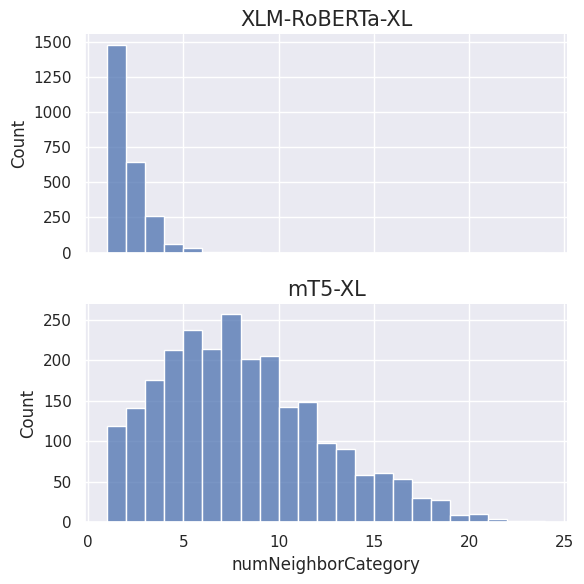

In [9]:
import seaborn as sns
plt.figure(figsize=(3, 10))
sns.set_theme(style="darkgrid")
g = sns.displot(
    pd.DataFrame(data).explode("numNeighborCategory"), 
    x="numNeighborCategory", row="model", row_order = ["XLM-RoBERTa-XL", "mT5-XL"],
    binwidth=1, height=3, aspect=2, facet_kws=dict(margin_titles=False, sharey=False, sharex=True)
)
g.set_titles(row_template="{row_name}", size=15)
plt.tight_layout()
plt.savefig(f"./figures/numNeighborCats.png", dpi=400)